In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
GB = pd.read_csv("GB results.csv")

neck_list_str = list(GB['loss_values_train'][0].replace('[','').replace(']','').replace('\n','').split(' '))
GB.at[0,'loss_values_train'] = [float(value) for value in neck_list_str if value != '']
neck_list_str = list(GB['loss_values_test'][0].replace('[','').replace(']','').replace('\n','').split(' '))
GB.at[0,'loss_values_test'] = [float(value) for value in neck_list_str if value != '']

waist_list_str = list(GB['loss_values_train'][1].replace('[','').replace(']','').replace('\n','').split(' '))
GB.at[1,'loss_values_train'] = [float(value) for value in waist_list_str if value != '']
waist_list_str = list(GB['loss_values_test'][1].replace('[','').replace(']','').replace('\n','').split(' '))
GB.at[1,'loss_values_test'] = [float(value) for value in waist_list_str if value != '']

wrist_list_str = list(GB['loss_values_train'][2].replace('[','').replace(']','').replace('\n','').split(' '))
GB.at[2,'loss_values_train'] = [float(value) for value in wrist_list_str if value != '']
wrist_list_str = list(GB['loss_values_test'][2].replace('[','').replace(']','').replace('\n','').split(' '))
GB.at[2,'loss_values_test'] = [float(value) for value in wrist_list_str if value != '']

GB

,dataset,best parameters,accuracy,precision,recall,f1,contingency matrix,loss_values_train,loss_values_test,n_estimators
0,Neck,"{'smote__k_neighbors': 4, 'gb__n_estimators': ...",0.976864,0.977156,0.976864,0.976943,[[264 6]\n [ 3 116]],"[0.399765155, 0.289278179, 0.234810853, 0.1882...","[0.41962085, 0.30272099, 0.24189589, 0.1978312...",500
1,Waist,"{'smote__k_neighbors': 10, 'gb__n_estimators':...",0.986111,0.986386,0.986111,0.986183,[[219 3]\n [ 1 65]],"[0.65567679, 0.61997677, 0.58712716, 0.5583036...","[0.65753355, 0.62170002, 0.5894084, 0.56201961...",400
2,Wrist,"{'smote__k_neighbors': 3, 'gb__n_estimators': ...",0.959128,0.958933,0.959128,0.959020,[[288 7]\n [ 8 64]],"[0.606040521, 0.534569415, 0.475957933, 0.4237...","[0.61858395, 0.55776497, 0.50896941, 0.4653524...",100


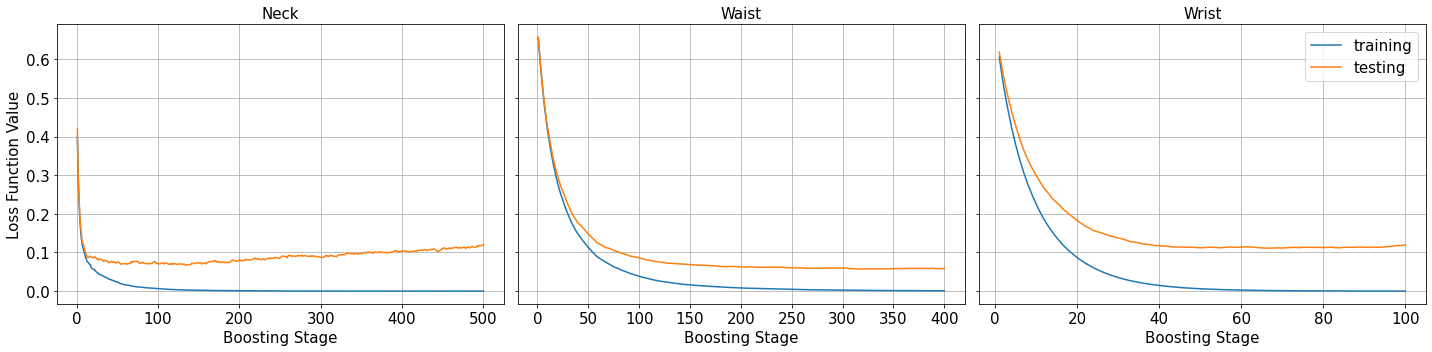

In [8]:
# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
# fig.suptitle('Trend of Loss Function Decrement for Gradient Boosting', fontsize=20)

neck_n_estimators = GB['n_estimators'][0]
neck_loss_values_train = GB['loss_values_train'][0]
neck_loss_values_test = GB['loss_values_test'][0]
# Plotting the trend of loss function decrement for Neck dataset
ax1.plot(np.arange(1, neck_n_estimators + 1), neck_loss_values_train, linestyle='-')
ax1.plot(np.arange(1, neck_n_estimators + 1), neck_loss_values_test, linestyle='-')
ax1.set_xlabel('Boosting Stage', fontsize=15)
ax1.set_ylabel('Loss Function Value', fontsize=15)
ax1.set_title('Neck', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.grid(True)

waist_n_estimators = GB['n_estimators'][1]
waist_loss_values_train = GB['loss_values_train'][1]
waist_loss_values_test = GB['loss_values_test'][1]
# Plotting the trend of loss function decrement for Waist dataset
ax2.plot(np.arange(1, waist_n_estimators + 1), waist_loss_values_train, linestyle='-')
ax2.plot(np.arange(1, waist_n_estimators + 1), waist_loss_values_test, linestyle='-')
ax2.set_xlabel('Boosting Stage', fontsize=15)
ax2.set_title('Waist', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.grid(True)

wrist_n_estimators = GB['n_estimators'][2]
wrist_loss_values_train = GB['loss_values_train'][2]
wrist_loss_values_test = GB['loss_values_test'][2]
# Plotting the trend of loss function decrement for Wrist dataset
ax3.plot(np.arange(1, wrist_n_estimators + 1), wrist_loss_values_train, linestyle='-', label='training')
ax3.plot(np.arange(1, wrist_n_estimators + 1), wrist_loss_values_test, linestyle='-', label='testing')
ax3.set_xlabel('Boosting Stage', fontsize=15)
ax3.set_title('Wrist', fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.grid(True)
ax3.legend(fontsize=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()